<a href="https://colab.research.google.com/github/adi271001/Nastech-Internship/blob/main/RNSIT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#REAL TIME OBJECT DETECTION USING VIDEO
#VEHICLE DETECTION
import cv2
cascade_src='cars.xml'
video_src='video1.avi'
cap=cv2.VideoCapture(video_src)
car_cascade=cv2.CascadeClassifier(cascade_src)
while True:
  ret,img=cap.read()
  if(type(img)==type(None)):
    break
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Grayscale
  cars=car_cascade.detectMultiScale(gray,1.1,1)
  for(x,y,w,h) in cars:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imshow('video',img)
    if cv2.waitKey(1)==13:
      break
cv2.destroyAllWindows()

In [2]:
#url for dataset https://nhrdf.org/en-us/DailyWiseMarketArrivals
#1 quintal=100 kgs
#select crop potato,market as Bangalore
#forecasting -fbprophet - facebook
#forecasting is prediction w.r.t date/
import pandas as pd
df=pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700
4181,22/Feb/2022,BANGALORE,7180,1600,2000,1800


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4182 non-null   object
 1   Market                4183 non-null   object
 2   Arrival(q)            4183 non-null   int64 
 3   Price Minimum (Rs/q)  4183 non-null   object
 4   Price Maximum (Rs/q)  4183 non-null   object
 5   Modal Price (Rs/q)    4183 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.2+ KB


In [ ]:
#to check missing values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#dropping null value
df=df.dropna()

In [ ]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
# rules for fb prophet
#1. it accepts only 2 columns
#2. column names should be ds(date/time) and y(someother value)
# hence we will consider date column and modal price column
#now rename date to ds
df=df.rename(columns={'Modal Price (Rs/q)':'y','Date':'ds'})

In [ ]:
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4177,15/Feb/2022,BANGALORE,9680,1500,1800,1650
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700


In [ ]:
#now create a new dataframe with only ds and y columns
df_new=df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4177,15/Feb/2022,1650
4178,16/Feb/2022,1650
4179,17/Feb/2022,1500
4180,18/Feb/2022,1700


In [ ]:
#the columns are not in required dataype format
#so convert ds to date time format
#convert y to int format
df_new['ds']=pd.to_datetime(df_new['ds'])
df_new['y']=df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4182 non-null   datetime64[ns]
 1   y       4182 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


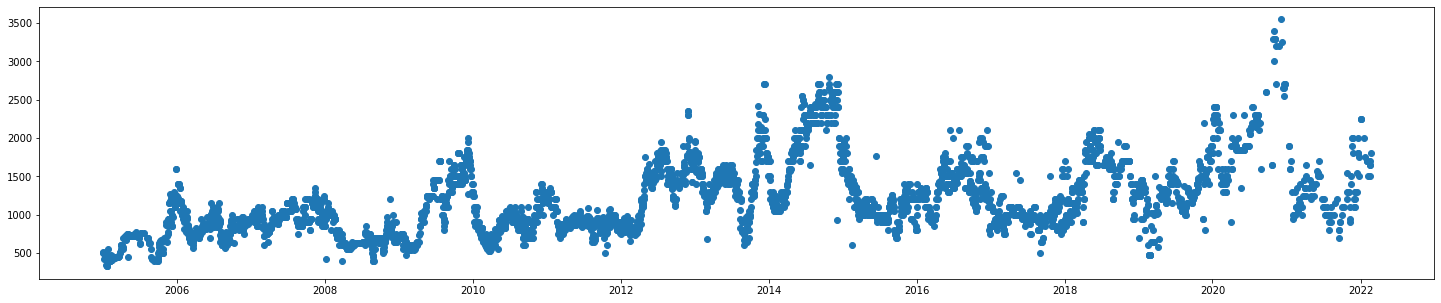

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.scatter(df_new['ds'],df_new['y'])


In [ ]:
#IF MODAL PRICE(Y) IS GREATER THAN 2750, make it as np.nan
import numpy as np
df_new['y']=np.where(df_new['y']>2750,np.nan,df_new['y'])
#using numpy make all the values as nan which r greater than 2750

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_new.isnull().sum()

ds     0
y     11
dtype: int64

In [ ]:
#fb prophet
import fbprophet
op=fbprophet.Prophet()
op.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=op.make_future_dataframe(periods=365,freq='D')
#So here we are forecasting for 365 days
forecast=op.predict(forecast) #predicts new forecast values

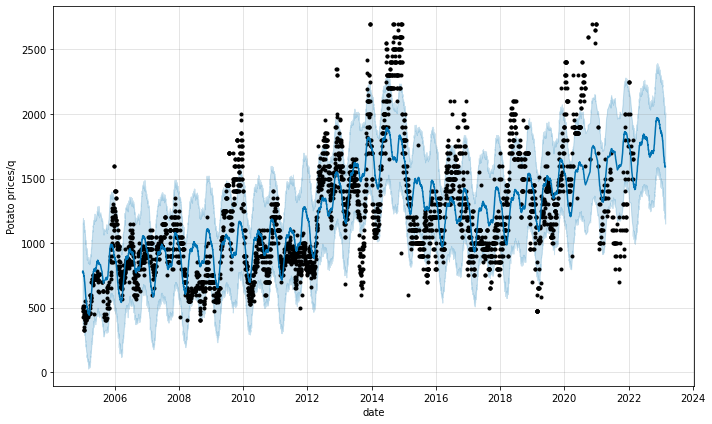

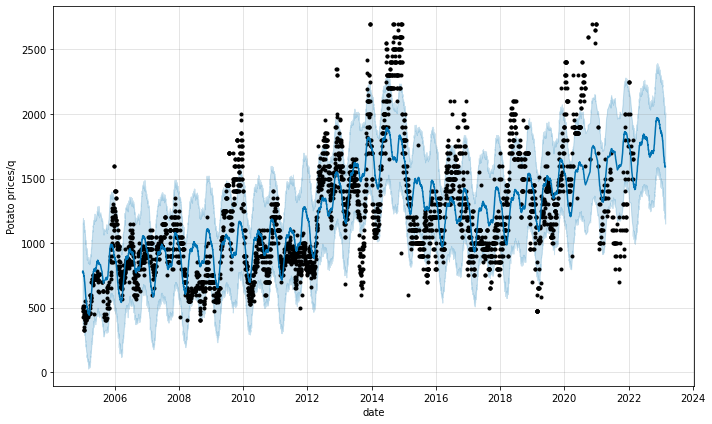

In [ ]:
op.plot(forecast,xlabel='date',ylabel='Potato prices/q')
#black scatter point real potato prices(2005-2022)
#light blue shade min and max value predicted by our model
#dark blue line the best fit line


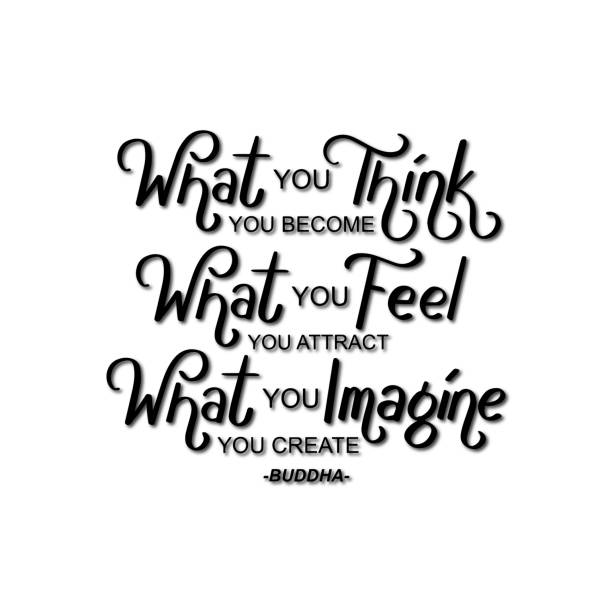

In [ ]:
#ocr-optical character recognition
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/1.jpg')
cv2_imshow(img)

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (13.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
!pip install pytesseract --quiet

In [ ]:
import pytesseract as pt
op=pt.image_to_string(img)
print(op)

Whale Tink,
Whale Feel
What welnagig

